In [48]:
import sys
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import csv
import gzip
import gensim 
import logging

#from gensim.models import Word2Vec
from sklearn.decomposition import PCA
#from matplotlib import plot

print('Tested with:')
print('Python', sys.version)
print({x.__name__: x.__version__ for x in [np, matplotlib]})

Tested with:
Python 3.6.1 |Anaconda custom (x86_64)| (default, May 11 2017, 13:04:09) 
[GCC 4.2.1 Compatible Apple LLVM 6.0 (clang-600.0.57)]
{'numpy': '1.12.1', 'matplotlib': '3.0.0'}


In [49]:
def read_classification_csv_data(fn):
    with open(fn) as csvfile:
        readCSV = csv.reader(csvfile, delimiter=',')
        ID_ = []
        First_n_ = []
        Last_n_ = []
        Is_Br_ = []
        for row in readCSV:
            #print(row)
            #print(row[0], row[1], row[2], row[3])
            ID = row[0]
            First_n = row[1]
            Last_n = row[2]
            Is_Br = row[3]
            
            ID_.append(ID)
            First_n_ .append(First_n)
            Last_n_ .append(Last_n)
            Is_Br_.append(Is_Br)
    return ID_, First_n_, Last_n_, Is_Br_

ID, First_name, Last_name, Is_Br = read_classification_csv_data('/Users/apple1/Desktop/project542/all/train.txt')
print(ID[1], First_name[1], Last_name[1], Is_Br[1])
print(ID[2], First_name[2], Last_name[2], Is_Br[2])
print(ID[3], First_name[3], Last_name[3], Is_Br[3])
print(ID[4], First_name[4], Last_name[4], Is_Br[4])

0 Ithalohfonseca Chaverinho 1
1 Gustavo Gon\xc3\xa7alves 1
2 Rafael Geraldo 1
3 Cristyan Victor 1


In [44]:
sentences = []
for i in range(1,6):
    sentences.append([First_name[i]])
for i in range(2500,2505):
    sentences.append([First_name[i]])
print(sentences)
model = gensim.models.Word2Vec(
        sentences,
        size=150,
        window=10,
        min_count=1,
        workers=10)
model.train(sentences, total_examples=len(sentences), epochs=10)

print(model)

[['Ithalohfonseca'], ['Gustavo'], ['Rafael'], ['Cristyan'], ['Valsemorborgesdesouza'], ['Kareem'], ['Bryan'], ['Aishwarya'], ['Joshua'], ['Nikta']]
Word2Vec(vocab=10, size=150, alpha=0.025)


In [45]:
words = list(model.wv.vocab)
print(words)
print(model['Rafael'])

['Ithalohfonseca', 'Gustavo', 'Rafael', 'Cristyan', 'Valsemorborgesdesouza', 'Kareem', 'Bryan', 'Aishwarya', 'Joshua', 'Nikta']
[ -7.48880848e-04   1.86553714e-03   2.37931890e-04   3.13374586e-03
  -2.35320348e-03   1.65950623e-03  -5.62950212e-04  -1.16571136e-04
  -1.31663994e-03  -8.66025861e-04   1.50236790e-03  -2.09952216e-03
   2.48827413e-03   1.22774555e-03   8.85833520e-04  -2.97412951e-03
  -3.27181583e-03  -2.17801798e-03  -1.69175153e-03   2.53842142e-03
   1.07310701e-03  -4.64476325e-04   2.22654827e-03  -6.00006024e-04
  -2.99488835e-04   2.52244971e-03   2.24447623e-03  -1.42191933e-03
  -3.01764649e-03  -2.13572965e-03  -1.28148834e-03  -1.07536325e-03
  -2.82421522e-03  -3.05297598e-03   6.42283645e-04   6.17990969e-04
   4.56754555e-04   2.18722038e-03   2.43999879e-04   2.45731161e-03
  -2.82274862e-03  -3.05172522e-03   2.42149970e-03  -2.96943518e-03
  -1.94493379e-03   2.12247157e-03   9.43359511e-04   2.61730026e-03
   1.84830779e-03  -1.54779133e-04   3.30847

/Users/apple1/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:3: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  This is separate from the ipykernel package so we can avoid doing imports until


/Users/apple1/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:3: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  This is separate from the ipykernel package so we can avoid doing imports until
No handles with labels found to put in legend.


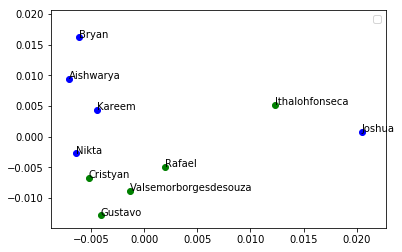

In [66]:
#visualize word

X = model[model.wv.vocab]
pca = PCA(n_components=2)
result = pca.fit_transform(X)

#plt.scatter(result[:, 0], result[:, 1], color = 'g')
for i in range(0,5):
    plt.scatter(result[i, 0], result[i, 1], color = 'g')
for i in range(5,10):
    plt.scatter(result[i, 0], result[i, 1], color = 'b')
    
words = list(model.wv.vocab)
for i, word in enumerate(words):
    plt.annotate(word, xy=(result[i, 0], result[i, 1]))
    

plt.show()

In [91]:
sentence1 = []
sentence2 = []
for i in range(1, 5000):
    if (Is_Br[i] == '1'): sentence1.append([First_name[i]])
    else:
        sentence2.append([First_name[i]])
        
# print(sentence1)
# print(sentence2)
model1 = gensim.models.Word2Vec(
        sentence1,
        size=150,
        window=10,
        min_count=1,
        workers=10)
model1.train(sentence1, total_examples=len(sentence1), epochs=10)

model2 = gensim.models.Word2Vec(
        sentence2,
        size=150,
        window=10,
        min_count=1,
        workers=10)
model2.train(sentence2, total_examples=len(sentence2), epochs=10)
print(model1)
print(model2)

Word2Vec(vocab=1383, size=150, alpha=0.025)
Word2Vec(vocab=1588, size=150, alpha=0.025)


In [93]:
words1 = list(model1.wv.vocab)
words2 = list(model2.wv.vocab)
print(words1)
print(words2)
print(model['Rafael'])

['Ithalohfonseca', 'Gustavo', 'Rafael', 'Cristyan', 'Valsemorborgesdesouza', 'Diegodereknobre', 'Paulonatan', 'Jardelurgalde', 'Deolindo', 'Gabrielbitencourt', 'Eduardo', 'Matheus', 'Fernando', 'Oohtalldomatheus', 'Gabriel', 'Raphael', 'Thiago', 'Juliandra', 'Guilherme', 'Willian', 'Welington', 'Eliasdaniel', 'Ruben', 'Hazard', 'Lucas', 'Pedro', 'Andre', 'Erick', 'Renan', 'Leandro', 'Kaiquesilva', 'Diego', 'Jean', 'Argiel', 'Caio', 'Paula', 'Jo\\xc3\\xa3ovitorde', 'John', 'Carlos', 'Matheusfilipe', 'Carla', 'Iori', 'Juliohenriquer', 'Rodolfo', 'Eugenio', 'Odilon', 'Paloma', 'Henry', 'F\\xc3\\xa1bio', 'Jackson', 'Vinicius', 'Frankisleyfrankisley', 'Rodrigo', 'Alex', 'Cleiton', 'Denilson', 'Leonardo', 'Daniel', 'Victor', 'Wesley', 'Aquiresrodrigues', 'Julio', 'Hed', 'Ramon', 'Kaique', 'Jo\\xc3\\xa3ovitor', 'Emellytramontina', 'Hugo', 'Franciscopaiva', 'Kauanzinhodo', 'Paulo', 'Davicosta', 'Douglas', 'V\\xc3\\xadtor', 'R\\xc3\\xab\\xc3\\xadn\\xc3\\xa1n', 'Gui', 'Claudio', 'Lucasgon\\xc3\\

/Users/apple1/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:5: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  """


In [ ]:
#visualize word

X1 = model1[model1.wv.vocab]
pca = PCA(n_components=2)
result1 = pca.fit_transform(X1)

X2 = model2[model2.wv.vocab]
pca = PCA(n_components=2)
result2 = pca.fit_transform(X2)

#plt.scatter(result1[:, 0], result1[:, 1], color = 'g')
# for i in range(0,5):
#     plt.scatter(result[i, 0], result[i, 1], color = 'g')
# for i in range(5,10):
#     plt.scatter(result[i, 0], result[i, 1], color = 'b')
plt.scatter(result2[:, 0], result2[:, 1], color = 'b') 

# words1 = list(model1.wv.vocab)
# words2 = list(model2.wv.vocab)
# for i, word1 in enumerate(words1):
#     plt.annotate(word1, xy=(result1[i, 0], result1[i, 1]))
# for i, word2 in enumerate(words2):
#     plt.annotate(word2, xy=(result2[i, 0], result2[i, 1]))

plt.show()